In [1]:
import pandas as pd
import numpy as np

In [2]:
ul = pd.read_csv('221025_use_log.csv')
cust_m = pd.read_csv('221025_customer_master.csv')
class_m = pd.read_csv('221025_class_master.csv')
camp_m = pd.read_csv('221025_campaign_master.csv')

- use_log(ul) : 이용 이력 데이터
- cust_m : 회원 정보 데이터(탈되한 회원을 포함한 모든 회원에 대한 정보)
- end data가 비어져있으면 탈퇴하지 않은 회원
- class_m : 회원 구분 데이터(종일 사용권인지, 주간 이용권인지, 야간 이용권인지)
- camp_m : 프로모션 구분 데이터(무료로 사용하는지, 반액 할인권인지, 일반권인지)


In [3]:
display(ul.head(3), cust_m.head(3), class_m.head(3), camp_m.head(3))

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


고객현황데이터인 cust_m에 class_m 데이터를 결합하여 새로운 데이터 프레임을 생성

In [4]:
cust_join = pd.merge(cust_m, class_m, on='class', how='left')
cust_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4192 entries, 0 to 4191
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  4192 non-null   object
 1   name         4192 non-null   object
 2   class        4192 non-null   object
 3   gender       4192 non-null   object
 4   start_date   4192 non-null   object
 5   end_date     1350 non-null   object
 6   campaign_id  4192 non-null   object
 7   is_deleted   4192 non-null   int64 
 8   class_name   4192 non-null   object
 9   price        4192 non-null   int64 
dtypes: int64(2), object(8)
memory usage: 360.2+ KB


In [5]:
cust_join = pd.merge( cust_join, camp_m, on='campaign_id', how='left')
print(len(cust_m), len(cust_join))
print("")
cust_join.info()
cust_join.isna().sum()

4192 4192

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4192 entries, 0 to 4191
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    4192 non-null   object
 1   name           4192 non-null   object
 2   class          4192 non-null   object
 3   gender         4192 non-null   object
 4   start_date     4192 non-null   object
 5   end_date       1350 non-null   object
 6   campaign_id    4192 non-null   object
 7   is_deleted     4192 non-null   int64 
 8   class_name     4192 non-null   object
 9   price          4192 non-null   int64 
 10  campaign_name  4192 non-null   object
dtypes: int64(2), object(9)
memory usage: 393.0+ KB


customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

원본인 cust_m과 결합된 새로운 데이터 프레임인 cust_join의 행의 수가 같아
열기준으로 결합이 잘 됨.

- 결측치를 확인하는 이유는 결합할 때, 키가 없거나 결합이 잘못되면 자동으로 결측치가 들어가 있어서 그러므로 결합후에는 결측치를 확인해주는 게 좋음
- 원래 결측치가 있던 end_data에만 결측치가 있으므로 데이터가 잘 들어가져 있다라고 확인됨

In [6]:
cust_join['customer_id'].nunique() 
#우리 고객수가 4192명이 맞다는 것을 알 수 있음

4192

#### cust_join 데이터프레임 분석

##### 분석을 하기 전에 어떤 궁금한 점이 있는지 생각하고 들어가야 한다.
예를 들면, 스포츠센터의 회원 정보를 분석하고 있는데 
- 어떤 종류의 회원이 있고 어떤 캠페인으로 많이 가입하는지?
- 언제 가입하고 탈퇴한 회원이 많은지?
- 남녀 비율은 어떤지?
- 탈퇴한 회원들은 얼마나 센터를 다녔는지?

In [7]:
print("===== 클래스 이름이 각각 몇개인지 =====")
print(cust_join['class_name'].value_counts())

print("")

print("===== 클래스 이름을 기준으로 회원의 수=====")
cust_join.groupby('class_name')['customer_id'].count()

===== 클래스 이름이 각각 몇개인지 =====
0_종일    2045
2_야간    1128
1_주간    1019
Name: class_name, dtype: int64

===== 클래스 이름을 기준으로 회원의 수=====


class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

In [8]:
# print(cust_join.shape)
# print(cust_join.groupby('class_name')['customer_id'].count())

print("===== 비율로 나타내기 ======")
round((cust_join.groupby('class_name')['customer_id'].count() / cust_join.shape[0])*100, 1)


===== 비율로 나타내기 ======


class_name
0_종일    48.8
1_주간    24.3
2_야간    26.9
Name: customer_id, dtype: float64

In [9]:
# 성별 현황/비율
print("========== 성별 현황 =============")
print(cust_join.groupby('gender')['customer_id'].count())
print("")
print("========== 성별 비율 =============")
print(round((cust_join.groupby('gender')['customer_id'].count() / cust_join.shape[0])*100, 1))

========== 성별 현황 =============
gender
F    1983
M    2209
Name: customer_id, dtype: int64

========== 성별 비율 =============
gender
F    47.3
M    52.7
Name: customer_id, dtype: float64


In [10]:
# 탈퇴자 현황/비율
print("========== 탈퇴자 현황 =============")
print(cust_join.groupby('is_deleted')['customer_id'].count())
print("")
print("========== 탈퇴자 비율 =============")
print(round((cust_join.groupby('is_deleted')['customer_id'].count() / cust_join.shape[0])*100, 1))

========== 탈퇴자 현황 =============
is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

========== 탈퇴자 비율 =============
is_deleted
0    67.8
1    32.2
Name: customer_id, dtype: float64


데이터 분석을 해보니
- 남자가 더 많이 가입했는데, 그 이유가 있을까?
- 탈퇴한 사람들은 왜 탈퇴했을까?   
이러한 궁금증을 확장할 수 있다

### 데이터를 조건별로 뽑아보기
- 탈퇴자가 섞여있으니까 최신 데이터를 기반으로 뽑고 싶다.
- 2019년 3월 이용자 뽑아보기!
- end date 19.3.31이전 데이터를 제외하고 뽑아낼 것임

In [11]:
cust_join['end_date'] = pd.to_datetime(cust_join['end_date'])
cust_new = cust_join[(cust_join['end_date'] >= pd.to_datetime('20190331')) | (cust_join['end_date'].isnull())]
print(cust_join.shape, cust_new.shape)

(4192, 11) (2953, 11)


In [12]:
cust_new['end_date'].unique()
print(round((cust_new.groupby('class_name')['customer_id'].count() / cust_new.shape[0])*100, 1))

class_name
0_종일    48.9
1_주간    23.6
2_야간    27.5
Name: customer_id, dtype: float64


In [13]:
# 프로모션 비율 확인하기
print("========== 프로모션 비율 =============")
print(round((cust_new.groupby('campaign_name')['customer_id'].count() / cust_new.shape[0])*100, 1))
# 성별 비율
print("========== 성별 비율 =============")
print(round((cust_new.groupby('gender')['customer_id'].count() / cust_new.shape[0])*100, 1))

========== 프로모션 비율 =============
campaign_name
0_입회비반액할인    10.5
1_입회비무료       8.2
2_일반         81.3
Name: customer_id, dtype: float64
========== 성별 비율 =============
gender
F    47.4
M    52.6
Name: customer_id, dtype: float64


<데이터 분석 해석>
- 회원권과 성별 변수에 대해서는 전체 데이터 대해 뽑았던 것과 비율이 크게 다르지 않음
    - 특정 회원권이나 성별이 탈퇴한 것은 아님
- 전체 데이터에서 프로모션 비율 중 일반가입이 70% 정도였는데, 최신 사용자 데이터에서는 일반 80% (10% 차이)
    - 프로모션으로 가입한 사람은 일반 가입한 사람보다 계속 이용할 가능성이 낮을수 있지않을까?

#### 이용이력 데이터 분석

회원이 스포츠센터를 이용할 때 시간이 찍히기 때문에 시간적 요소를 분석해볼수 있겠다

<예시>
- 한 달 이용 횟수의 변화
- 회원이 스포츠센터를 정기적으로 이용하는지
- 회원들이 월 별 스포츠센터를 이용하는 평균 수치, 중앙값, 최대, 최소값

In [14]:
# 데이터를 날짜형 데이터로 변환
ul['usedate'] = pd.to_datetime(ul['usedate']) 
# 새로운 컬럼을 추가
ul['년월'] = ul['usedate'].dt.strftime("%Y%m")
ul.head(3)

,log_id,customer_id,usedate,년월
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804


In [15]:
# 고객 id별 월별 이용회수 카운트
ul_month = ul.groupby(['년월', 'customer_id'], as_index=False).count()
ul_month

#### 월별 고객의 스포츠센터 사용횟수 데이터
# 컬럼 이름 변경
ul_month.rename(columns={'log_id' : 'cnt'}, inplace=True)
ul_month

ul_month.drop('usedate', axis=1, inplace=True)
ul_month

,년월,customer_id,cnt
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [16]:
# 고객별 월 평균 사용횟수
ul_cust = ul_month.groupby('customer_id')['cnt'].agg([np.mean, np.median, np.max, np.min])
ul_cust

# 인덱스 설정
ul_cust = ul_cust.reset_index(drop = False)
ul_cust


,customer_id,mean,median,amax,amin
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4
...,...,...,...,...,...
4187,TS995853,9.500000,9.5,11,8
4188,TS998593,8.142857,8.0,9,7
4189,TS999079,4.916667,5.5,9,2
4190,TS999231,4.666667,5.0,8,1


##### __정기적으로 센터를 사용하는 고객인지 확인__
어떻게 확인할 것인가?   
매주 같은 요일에 스포츠센터레 왔는지 아닌지 판단하고  
월이나 요일별로 방문한 횟수의 최대값이 4이상인 요일이 하나라도 있으면  
이 회원은 정기 사용자로 판단

In [17]:
# 요일 뽑는 방법 : weekday 사용하기
# weekday : 월요일 -0, 일요일-6
ul['weekday'] = ul['usedate'].dt.weekday
ul.head(3)

,log_id,customer_id,usedate,년월,weekday
0,L00000049012330,AS009373,2018-04-01,201804,6
1,L00000049012331,AS015315,2018-04-01,201804,6
2,L00000049012332,AS040841,2018-04-01,201804,6


In [18]:
ul_week = ul.groupby(['customer_id', '년월', 'weekday'], as_index=False).count()
ul_week

,customer_id,년월,weekday,log_id,usedate
0,AS002855,201804,5,4,4
1,AS002855,201805,2,1,1
2,AS002855,201805,5,4,4
3,AS002855,201806,5,5,5
4,AS002855,201807,1,1,1
...,...,...,...,...,...
93328,TS999855,201901,1,1,1
93329,TS999855,201901,5,4,4
93330,TS999855,201901,6,1,1
93331,TS999855,201902,5,4,4


In [19]:
ul_week.rename(columns={'log_id':'cnt'}, inplace=True)
ul_week

,customer_id,년월,weekday,cnt,usedate
0,AS002855,201804,5,4,4
1,AS002855,201805,2,1,1
2,AS002855,201805,5,4,4
3,AS002855,201806,5,5,5
4,AS002855,201807,1,1,1
...,...,...,...,...,...
93328,TS999855,201901,1,1,1
93329,TS999855,201901,5,4,4
93330,TS999855,201901,6,1,1
93331,TS999855,201902,5,4,4


In [20]:
del ul_week['usedate'] #동일한 값을 갖고 있으니 삭제
ul_week

# → 토요일마다 정기적을 방문한 사람인가?  

,customer_id,년월,weekday,cnt
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1
...,...,...,...,...
93328,TS999855,201901,1,1
93329,TS999855,201901,5,4
93330,TS999855,201901,6,1
93331,TS999855,201902,5,4


##### __정기적인 사람인지 보고 싶음__
- ul_week 데이터 프레임을 가지고  
- 정기적으로 방문하는지 아닌지를 명확하게 하기위해  
- cnt 4이상이면 1, 아니면 0인 컬럼을 만들기  

In [21]:
# 어떤 요일에 가장 자주 왔을까. 큰 값만 남기기
# ul_week = ul_week.groupby('customer_id', as_index=False)[['weekday','cnt']].max()
ul_week = ul_week.groupby('customer_id', as_index=False)[['cnt']].max()
ul_week

,customer_id,cnt
0,AS002855,5
1,AS008805,4
2,AS009013,2
3,AS009373,5
4,AS015233,5
...,...,...
4187,TS995853,5
4188,TS998593,5
4189,TS999079,5
4190,TS999231,5


In [22]:
# 방법1 : apply lambda
ul_week['flag'] = ul_week['cnt'].apply(lambda x : 1 if x>= 4 else 0)
    # x가 4보다 크거나 닽으면 1, 아니면 0을 각 셀에 적용해라


# 방법2 : 불리언 인덱싱
ul_week['flag2'] = 0 
    # 일단 1개 값으로 다 넣고
is_over4 = (ul_week['cnt'] >= 4) 
    # cnt가 4회 이상이면 True로 아니면 False로 반환된 cnt시리즈로 저장
ul_week.loc[(is_over4), 'flag2'] = 1
ul_week


# 방법3
ul_week['flag3'] = 0 # 위와 동일한 이유
ul_week['flag3'] = ul_week['flag3'].where(ul_week['cnt'] < 4, 1)
    # where이라는 조건문을 사용해서 cnt가 
    # 4보다 작으면 그대로, 아니라면 1을 넣도록 설정해준다.
ul_week

,customer_id,cnt,flag,flag2,flag3
0,AS002855,5,1,1,1
1,AS008805,4,1,1,1
2,AS009013,2,0,0,0
3,AS009373,5,1,1,1
4,AS015233,5,1,1,1
...,...,...,...,...,...
4187,TS995853,5,1,1,1
4188,TS998593,5,1,1,1
4189,TS999079,5,1,1,1
4190,TS999231,5,1,1,1


### 고객 데이터와 이용이력 데이터 조인

In [23]:
display(cust_join.head(3), ul_cust.head(3), ul_week.head(3))

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반


,customer_id,mean,median,amax,amin
0,AS002855,4.5,5.0,7,2
1,AS008805,4.0,4.0,8,1
2,AS009013,2.0,2.0,2,2


,customer_id,cnt,flag,flag2,flag3
0,AS002855,5,1,1,1
1,AS008805,4,1,1,1
2,AS009013,2,0,0,0


##### 공통컬럼 'customer_id'를 기준으로 데이터 조인

In [24]:
cust_join = pd.merge(cust_join, ul_cust, on='customer_id', how='left')
cust_join.head(3)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,amax,amin
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3


In [25]:
cust_join = pd.merge(cust_join, ul_week[['customer_id', 'flag']]
                     , on = 'customer_id'
                     , how = 'left')
cust_join.head(2)
print(len(cust_join))

4192


In [26]:
# 결측치 확인하기
cust_join.isnull().sum()
    # end_date는 탈퇴했으면 null이기 때문에 있는 거

# 회원기간을 계산
cust_join['cal_date'] = cust_join['end_date']
cust_join.head(2)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,amax,amin,flag,cal_date
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,NaT
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,NaT


In [27]:
# end_date가 비워진 경우 → 2019-04-30으로 채워주고
    # 3월까지 나가진 않은 사람들 4월까지 다녔다는 가정하에
cust_join['cal_date'].fillna(pd.to_datetime('20190430'), inplace = True)
cust_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,amax,amin,flag,cal_date
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,8.000000,8.0,8,8,0,2019-04-30
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,10.000000,10.0,10,10,0,2019-04-30
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaT,CA1,0,2_야간,6000,2_일반,8.000000,8.0,8,8,0,2019-04-30
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,11.000000,11.0,11,11,0,2019-04-30


In [28]:
cust_join['start_date'] = pd.to_datetime(cust_join['start_date'])
cust_join['end_date'] = pd.to_datetime(cust_join['end_date'])
cust_join['cal_date'] = pd.to_datetime(cust_join['cal_date'])
cust_join.head(3)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,amax,amin,flag,cal_date
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30


np.timedelta64(1, "M")
__*단위코드*__  
- Y : 년  
- M : 월  
- W : 주  
- D : 일  
- h : 시간  
- m : 분  
- s : 초  
- ms : 밀리초  
- us : 마이크로초  
- ns : 나노초  
- ps : 피코초  
- fs : 펨토초  

In [29]:
cust_join['lasting_period'] = (cust_join['cal_date'] - cust_join['start_date']) / np.timedelta64(1, "M")
cust_join.head(3)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,amax,amin,flag,cal_date,lasting_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47.968131
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47.968131
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47.968131


##### 고객 행동의 통계량 파악

In [30]:
cust_join[['mean', 'median', 'amax', 'amin']].describe()

,mean,median,amax,amin
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


##### 알 수 있는 점
- 1인당 월 평균 5.3회, 1인당 중간값 5.2
- 1인당 최대 이용횟수 7.8, 최소 이용횟수 3회

In [31]:
# flag를 뽑은 이유는 정기적인 사용자인지 알기 위해서임
# 전체 고객 중 정기적으로 스포츠센터를 이용하는 비율은?
round(cust_join.groupby('flag').count()['customer_id']/cust_join.shape[0] * 100, 1)


flag
0    18.6
1    81.4
Name: customer_id, dtype: float64

- flag가 1이면 한달동안 특정요일에 4번 이상 스포츠센터를 방문함
- 정기적으로 이용하는 사람이다 하는 가정하에

- 정기적으로 이용하는 사람은 81.4%임

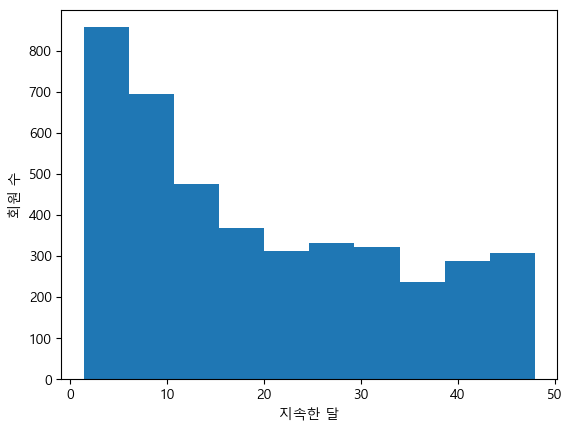

In [33]:
# 전체 회원들 중에서 얼만큼 스포츠 센터를 다녔는지 기간을 뽑아보기
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.hist(cust_join['lasting_period'])
plt.xlabel('지속한 달')
plt.ylabel('회원 수')
plt.show()

# 알 수 있는 것
   # 10개월 이상으로 가면 지속력이 떨어지는데,
   # "10개월이 고비일수도 있겠다"
   # "10개월이상 다니게 하려면 어떤 방법이 있을까?"
   # 이렇게 생각을 이어나갈 수 있다.


##### 탈퇴회원과 지속하는 회원과 차이를 파악해보자

In [34]:
# 탈퇴회원 통계량
cust_join[cust_join['is_deleted'] == 1].describe()

,is_deleted,price,mean,median,amax,amin,flag,lasting_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.878534
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.095672
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.445615
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.928233
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.950882
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.959178
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.951210


In [35]:
# 다니고 있는 회원의 통계량
cust_join[cust_join['is_deleted'] == 0].describe()

# 알 수 있는 것
   # 탈퇴회원은 지속회원보다 매월 이용횟수가 평균, 중간값, 최대, 최소 모두 작음
   # falg를 보면 탈퇴한 회원보다 지속해서 다는 회원이 1에 가깝다는 것을 알 수 있음
   # lasting_period를 비교하면 탕퇴한 사람은 8달정도, 지속회원은 24정도로 차이가 남

,is_deleted,price,mean,median,amax,amin,flag,lasting_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,24.840061
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.827461
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.511325
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.813405
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.936857
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.943243
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.968131


In [36]:
# 전처리한 데이터 저장하기
cust_join.to_csv('221025_ustomer_join.csv', index=False)